<center>
<img src='img/insurance.png' width=300>
    <h3>Kaggle.com<h5>https://www.kaggle.com/c/prudential-life-insurance-assessment</h5></h3>
    <h1>Prudential Life Insurance Assessment</h1>
</center>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn
#!pip install scikit-plot
import scikitplot as skplt
#!pip install nbconvert

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import power_transform

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.multiclass import OneVsOneClassifier

### Data Import

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head(10)

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   
5  10               1             D2              26        0.230769   
6  11               1             A8              10        0.166194   
7  14               1             D2              26        0.076923   
8  15               1             D3              26        0.230769   
9  16               1             E1              21        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   
5               3               1               1  0.507463  0.836364  ...   
6               2               3               1  0.373134  0.581818  ...   
7               2               3               1  0.611940  0.781818  ...   
8               2               3               1  0.522388  0.618182  ...   
9               2               3               1  0.552239  0.600000  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  
5                   0                   0                   0         8  
6                   0                   0                   0         8  
7                   0                   0                   0         1  
8                   0                   0                   0         8  
9                   0                   0                   0         1  

[10 rows x 128 columns]

### Data Preparation

In [4]:
df_train = df_train.set_index('Id')

In [5]:
X = df_train.drop('Response', axis = 1)
y = df_train['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2021)

In [6]:
X_train['Product_Info_2'].nunique('count')

19

In [7]:
X_train.shape

(35628, 126)

In [8]:
X_test.shape

(23753, 126)

In [9]:
X_train = pd.get_dummies(X_train, columns = ['Product_Info_2'])
X_train.head()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
Id                                                                      
62380               1              26        0.230769               2   
3661                1              26        0.230769               2   
35368               1              26        0.076923               2   
15929               1              26        0.333333               2   
63329               1              26        0.025641               2   

       Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
Id                                                                              
62380               3               1  0.373134  0.745455  0.288703  0.428780   
3661                3               1  0.179104  0.600000  0.194561  0.401949   
35368               3               1  0.104478  0.636364  0.150628  0.280873   
15929               3               1  0.626866  0.781818  0.384937  0.542768   
63329               1               1  0.552239  0.672727  0.420502  0.745282   

       ...  Product_Info_2_B2  Product_Info_2_C1  Product_Info_2_C2  \
Id     ...                                                            
62380  ...                  0                  0                  0   
3661   ...                  1                  0                  0   
35368  ...                  0                  0                  0   
15929  ...                  0                  0                  0   
63329  ...                  0                  0                  0   

       Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_D1  \
Id                                                               
62380                  0                  0                  0   
3661                   0                  0                  0   
35368                  0                  0                  0   
15929                  0                  0                  0   
63329                  0                  0                  0   

       Product_Info_2_D2  Product_Info_2_D3  Product_Info_2_D4  \
Id                                                               
62380                  0                  1                  0   
3661                   0                  0                  0   
35368                  0                  0                  1   
15929                  1                  0                  0   
63329                  0                  0                  0   

       Product_Info_2_E1  
Id                        
62380                  0  
3661                   0  
35368                  0  
15929                  0  
63329                  0  

[5 rows x 144 columns]

In [10]:
X_test = pd.get_dummies(X_test, columns = ['Product_Info_2'])
X_test.head()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
Id                                                                      
6717                1              26        1.000000               2   
16328               1              26        0.230769               2   
54429               1              26        1.000000               2   
4025                1              26        0.333333               2   
33125               1              26        0.076923               2   

       Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
Id                                                                              
6717                1               1  0.492537  0.818182  0.456067  0.607300   
16328               1               1  0.268657  0.690909  0.255230  0.425442   
54429               3               1  0.164179  0.781818  0.271967  0.369707   
4025                3               1  0.746269  0.763636  0.246862  0.345795   
33125               3               1  0.791045  0.800000  0.334728  0.448237   

       ...  Product_Info_2_B2  Product_Info_2_C1  Product_Info_2_C2  \
Id     ...                                                            
6717   ...                  0                  0                  0   
16328  ...                  0                  0                  0   
54429  ...                  0                  0                  0   
4025   ...                  0                  0                  0   
33125  ...                  0                  0                  0   

       Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_D1  \
Id                                                               
6717                   0                  0                  0   
16328                  0                  0                  0   
54429                  0                  0                  0   
4025                   0                  0                  1   
33125                  0                  0                  1   

       Product_Info_2_D2  Product_Info_2_D3  Product_Info_2_D4  \
Id                                                               
6717                   0                  1                  0   
16328                  0                  1                  0   
54429                  0                  0                  0   
4025                   0                  0                  0   
33125                  0                  0                  0   

       Product_Info_2_E1  
Id                        
6717                   0  
16328                  0  
54429                  0  
4025                   0  
33125                  0  

[5 rows x 144 columns]

In [11]:
X_test.shape

(23753, 144)

In [12]:
X_train.shape

(35628, 144)

In [13]:
isNull_train = X_train.isna().sum(axis = 0).sort_values(ascending = False)
isNull_train.head(15)

Medical_History_10     35296
Medical_History_32     34944
Medical_History_24     33352
Medical_History_15     26725
Family_Hist_5          25191
Family_Hist_3          20601
Family_Hist_2          17172
Insurance_History_5    15317
Family_Hist_4          11437
Employment_Info_6       6531
Medical_History_1       5323
Employment_Info_4       4026
Employment_Info_1         15
Medical_History_14         0
Medical_History_13         0
dtype: int64

In [14]:
X_train = X_train.fillna(0)

In [15]:
X_test = X_test.fillna(0)

In [16]:
isNull_test = X_test.isna().sum(axis = 0).sort_values(ascending = False)
isNull_test.head(15)

Product_Info_2_E1     0
Product_Info_2_D4     0
Medical_History_16    0
Medical_History_15    0
Medical_History_14    0
Medical_History_13    0
Medical_History_12    0
Medical_History_11    0
Medical_History_10    0
Medical_History_9     0
Medical_History_8     0
Medical_History_7     0
Medical_History_6     0
Medical_History_5     0
Medical_History_4     0
dtype: int64

In [17]:
y_test.isna().sum()

0

### Attribute Selection

In [18]:
selection_mutual = SelectKBest(k = 60, score_func = mutual_info_classif)  

selection_mutual.fit(X_train, y_train)
selection_mutual.get_support()

array([False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [19]:
X_train_reduced = X_train.loc[:, selection_mutual.get_support()]
X_train_reduced.shape

(35628, 60)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

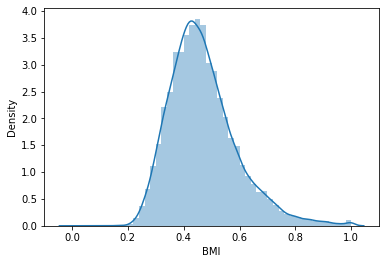

In [20]:
sns.distplot(X_train_reduced['BMI'])
# 'Ins_Age', 'Ht', 'Wt', 'BMI' ...

In [21]:
X_transf = power_transform(X_train_reduced, method = 'yeo-johnson')

### Setting Parameters

In [22]:
models = {'Naive Bayes':GaussianNB(), 
          'Decision Tree': DecisionTreeClassifier(), 
          'Random Forest': RandomForestClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier(), 
          'KNeighbor' : KNeighborsClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier()} 

result_dict = {}

for name, model in models.items():

    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    result_dict.update(
    { name:
         {
          'Accuracy': accuracy_score(y_test, y_hat),
          'Precision (weighted)': precision_score(y_test, y_hat, average = 'weighted'),
          'Recall (weighted)': recall_score(y_test, y_hat, average = 'weighted'),
          'F1 (weighted)': f1_score(y_test, y_hat, average = 'weighted')
          # 'precision_recall_fscore_support': precision_recall_fscore_support(y_test, y_hat, average = 'weighted'),
        }
    })

In [23]:
result_dict

{'Naive Bayes': {'Accuracy': 0.36972171936176484,
  'Precision (weighted)': 0.37249726532953564,
  'Recall (weighted)': 0.36972171936176484,
  'F1 (weighted)': 0.3260751121094439},
 'Decision Tree': {'Accuracy': 0.4288721424662148,
  'Precision (weighted)': 0.42981169565289473,
  'Recall (weighted)': 0.4288721424662148,
  'F1 (weighted)': 0.42926126773222884},
 'Random Forest': {'Accuracy': 0.5491516861028081,
  'Precision (weighted)': 0.5314104975492052,
  'Recall (weighted)': 0.5491516861028081,
  'F1 (weighted)': 0.5141824894985225},
 'Gradient Boosting': {'Accuracy': 0.5646444659621942,
  'Precision (weighted)': 0.5416241069171774,
  'Recall (weighted)': 0.5646444659621942,
  'F1 (weighted)': 0.5347511838558441},
 'KNeighbor': {'Accuracy': 0.3061508020039574,
  'Precision (weighted)': 0.269275345796699,
  'Recall (weighted)': 0.3061508020039574,
  'F1 (weighted)': 0.28129572336812864},
 'AdaBoostClassifier': {'Accuracy': 0.5105460362901528,
  'Precision (weighted)': 0.4760245759658

In [24]:
model_RF = RandomForestClassifier()

In [25]:
parameters = {'n_estimators':[70, 150, 200],
              'max_features' : ['auto', 'log2', 2, 4],
              'min_samples_split':[2, 4],
              'min_samples_leaf' : [2, 4],
              'max_depth' : [10, 20]
             }

In [26]:
grid = GridSearchCV(model_RF, parameters, cv = 5, scoring = 'roc_auc_ovo', n_jobs = -1)

In [27]:
grid.fit(X_train_reduced, y_train)
print('Best Params: ', grid.best_params_)

Best Params:  {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
model_RF_refined = RandomForestClassifier(max_depth = 20,
                                          max_features = 'auto',
                                          min_samples_leaf = 2,
                                          min_samples_split = 2,
                                          class_weight = {1:3, 2:3, 3:20, 4:13, 5:3, 6:2, 7:3, 8:1},
                                          n_estimators = 200)

### Algorithm Performance Comparison

In [29]:
print('RF (Original): ', cross_val_score(model_RF, X_train, y_train, cv = 5, scoring = 'roc_auc_ovo', n_jobs = -1).mean())

RF (Original):  0.80400783315816


In [30]:
print('RF (Best Atts): ', cross_val_score(model_RF, X_train_reduced, y_train, cv = 5, scoring = 'roc_auc_ovo', n_jobs = -1).mean())

RF (Best Atts):  0.8040966809537571


In [31]:
print('RF (Transf. Atts): ', cross_val_score(model_RF, X_transf, y_train, cv = 5, scoring = 'roc_auc_ovo', n_jobs = -1).mean())

RF (Transf. Atts):  0.8014168193611185


In [32]:
print('RF (Opt. Params): ', cross_val_score(model_RF_refined, X_train_reduced, y_train, cv = 5, scoring = 'roc_auc_ovo', n_jobs = -1).mean())

RF (Opt. Params):  0.8231307436479645


### Model Evaluation

In [33]:
model_RF_refined.fit(X_train, y_train)
y_hat = model_RF_refined.predict(X_test)

In [34]:
unique_pred, counts_pred = np.unique(y_hat, return_counts = True)
dict(zip(unique_pred, counts_pred))

{1: 1065, 2: 1460, 3: 239, 4: 743, 5: 2080, 6: 5098, 7: 3995, 8: 9073}

In [35]:
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique, counts))

{1: 2523, 2: 2633, 3: 418, 4: 579, 5: 2145, 6: 4431, 7: 3187, 8: 7837}

In [36]:
confusion_matrix(y_test, y_hat)

array([[ 452,  359,   36,   85,  234,  518,  371,  468],
       [ 226,  632,   28,   59,  333,  544,  346,  465],
       [  19,   20,  106,   77,   56,  116,   11,   13],
       [  18,    2,   17,  316,    0,  155,   23,   48],
       [  63,  219,   25,    8, 1169,  343,  164,  154],
       [ 178,  189,   23,  148,  239, 2165,  748,  741],
       [  70,   20,    2,   14,   28,  665, 1582,  806],
       [  39,   19,    2,   36,   21,  592,  750, 6378]], dtype=int64)

Text(69.0, 0.5, 'Real')

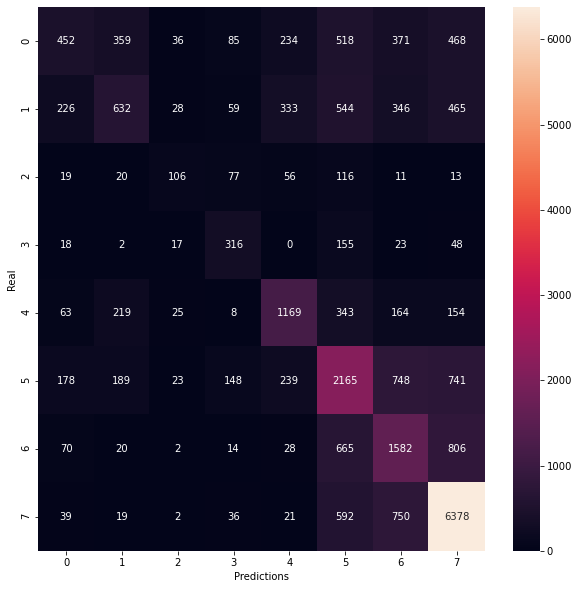

In [37]:
plt.figure(figsize = (10, 10))
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_hat), ax = ax, annot = True, fmt = 'g')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real')

In [38]:
prec = precision_score(y_test, y_hat, average = 'weighted')
rec = recall_score(y_test, y_hat, average = 'weighted')
f1 = f1_score(y_test, y_hat, average = 'weighted')

f'Our model has {np.round(prec * 100, 2)}% accuracy, {np.round(rec * 100, 2)}% recall & {np.round(f1 * 100, 2)}% f1-score'

'Our model has 52.63% accuracy, 53.89% recall & 52.11% f1-score'

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

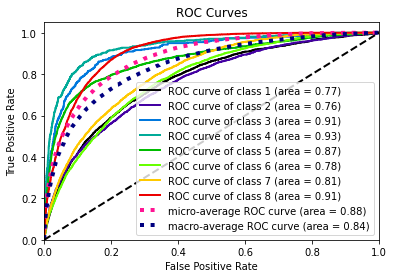

In [39]:
model_RF_refined.fit(X_train, y_train)

skplt.metrics.plot_roc(y_test, model_RF_refined.predict_proba(X_test))

### Best Attributes Overview

In [40]:
sfm = SelectFromModel(model_RF_refined, threshold = 0.01)
sfm.fit(X_train, y_train)

X_train.columns[sfm.get_support()]

Index(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_2', 'Employment_Info_6', 'InsuredInfo_3',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_2', 'Medical_History_4', 'Medical_History_15',
       'Medical_History_23', 'Medical_Keyword_15'],
      dtype='object')

In [41]:
model_RF_refined.feature_importances_

array([1.81966941e-03, 4.78739287e-03, 4.87797181e-02, 2.79048824e-04,
       4.96615275e-03, 9.96935383e-04, 4.25638870e-02, 3.23688531e-02,
       6.52130562e-02, 8.88569459e-02, 3.70344300e-02, 1.55976672e-02,
       4.49224811e-03, 8.18496131e-03, 3.74289200e-03, 3.04904402e-02,
       5.84112246e-03, 1.03846345e-03, 1.94648363e-02, 4.47894628e-03,
       2.17163793e-03, 9.75639609e-03, 2.38071255e-03, 5.24452703e-03,
       2.16318833e-03, 4.10353124e-03, 7.33003664e-03, 2.30302391e-02,
       5.68263251e-03, 8.26143360e-03, 4.27376210e-03, 9.55530096e-03,
       2.22486443e-02, 2.32944327e-02, 2.80308424e-02, 1.76795044e-02,
       2.94379705e-02, 2.99109889e-02, 3.40525037e-03, 6.72971760e-02,
       7.22157473e-04, 2.72697745e-03, 1.16418953e-03, 3.53416892e-03,
       7.01280378e-03, 5.31538947e-04, 2.09436185e-04, 2.33907417e-03,
       5.72587303e-03, 1.00018416e-03, 3.94898159e-02, 5.74658312e-03,
       1.29620271e-03, 2.54094779e-03, 1.31799352e-03, 1.26100734e-03,
      

In [42]:
feature_importances = pd.DataFrame({'Attributes' : X_train.columns, 'Importance' : model_RF_refined.feature_importances_}).sort_values(by = 'Importance', ascending = True)
feature_importances.head(20)

Attributes  Importance
70   Medical_History_35    0.000027
128   Product_Info_2_A4    0.000100
136   Product_Info_2_C2    0.000149
138   Product_Info_2_C4    0.000151
137   Product_Info_2_C3    0.000182
46   Medical_History_11    0.000209
133   Product_Info_2_B1    0.000213
90   Medical_Keyword_14    0.000224
96   Medical_Keyword_20    0.000235
135   Product_Info_2_C1    0.000255
94   Medical_Keyword_18    0.000265
89   Medical_Keyword_13    0.000277
3        Product_Info_5    0.000279
85    Medical_Keyword_9    0.000299
117  Medical_Keyword_41    0.000308
73   Medical_History_38    0.000319
120  Medical_Keyword_44    0.000334
93   Medical_Keyword_17    0.000352
95   Medical_Keyword_19    0.000372
66   Medical_History_31    0.000388

<AxesSubplot:ylabel='Attributes'>

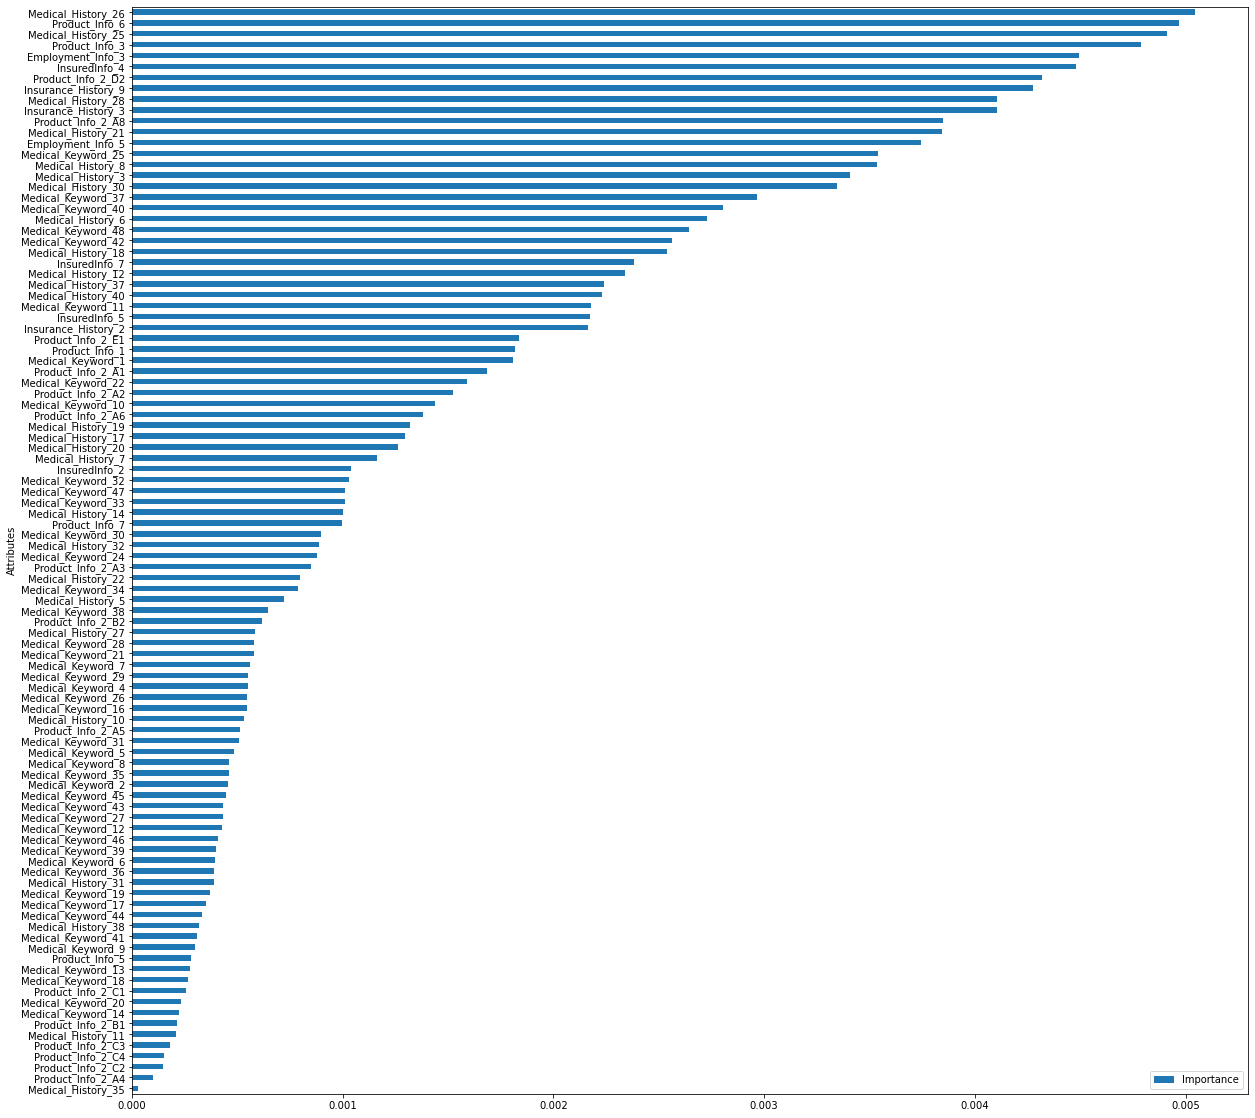

In [43]:
feature_importances.head(100).plot.barh(x = 'Attributes', y = 'Importance', figsize = (20, 20))

In [44]:
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])
